In [1]:
import numpy as np
import pandas as pd 

import tensorflow as tf
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import os

In [2]:
train_df = pd.read_csv('train.csv.zip').fillna(' ')

train_df.sample(10, random_state = 1234)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
12345,20bc45f5014c1eca,"""\n\nYour latest edit has again had to be remo...",0,0,0,0,0,0
55587,948580166b8b8745,"""\n\nWorks for me. BaStun not BaTsun """,0,0,0,0,0,0
16877,2c8519885db5c0bb,List of newspapers in India by readership\n\nT...,0,0,0,0,0,0
140039,ed64d530a34aa973,Happy New Years\nCheers ),0,0,0,0,0,0
125777,a0dd897eafbada2c,Photos \nSouthwestern’s official website has m...,0,0,0,0,0,0
159512,ff2f5695bb9aa845,"How's this? It's a lot shorter, but it's more ...",0,0,0,0,0,0
121612,8aa46e67645e4b7b,Why did you remove skinwalker instead of movin...,0,0,0,0,0,0
7588,142d9e745d03c9ef,"""I repeat, the text was about a minority schoo...",0,0,0,0,0,0
9463,191a1c6bd40ad470,bay pigs article \n\nhi i noticed that you wer...,1,0,1,0,0,0
103236,287b2d375ed7188a,"MusikAnimal is a liar, a disinformant and plag...",0,0,0,0,0,0


In [3]:
x = train_df['comment_text'].values 
print(x)

["Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"
 "D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"
 "Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info."
 ...
 'Spitzer \n\nUmm, theres no actual article for prostitution ring.  - Crunch Captain.'
 'And it looks like it was actually you who put on the speedy to have the first version deleted now that I look at it.'
 '"\nAnd ... I really don\'t think you understand.  I came here and my idea was bad right away.  What kind of community goes ""you have bad ideas"" go away, instead o

In [4]:
train_df.loc[train_df['toxic'] == 1].sample(10, random_state=1234)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
86296,e6cfe09510b15145,and are Angelique KKKarrington-hating Jews!]],1,0,0,0,0,0
8619,16e110672dde00d9,How civil is this - who the fuck do you think ...,1,1,1,0,1,0
123695,958e4d243a743156,"""\n\n idiot \n\n i do not understand what use...",1,0,1,0,1,0
120058,820861d281284864,"""::I'd hoped for a better, more neutral respon...",1,0,0,0,0,0
157801,e381fcf1759b1d0f,"""\n\nComments from the west are irrelevant, we...",1,0,0,0,0,0
132607,c57242ec5816d21c,"""\n\nYOUR MOM IS SO FAT, SHE GETS CASHBACK WHE...",1,1,1,0,1,1
73811,c580d59f2a359dcc,"[User talk:JesseRafe|talk]], How dare you call...",1,0,0,0,1,0
17995,2f85b9f5219235df,"to be honest with you, if you don't tell me a ...",1,0,0,0,0,0
45799,7a675e86c2e62890,"P.S. I need some penis, cat tongue is getting old",1,0,1,0,0,0
148162,47cf25a86ba2dc49,FUCK ALL MODERNISTS \n\nI WISH THE ROMAN EMPIR...,1,0,1,0,0,0


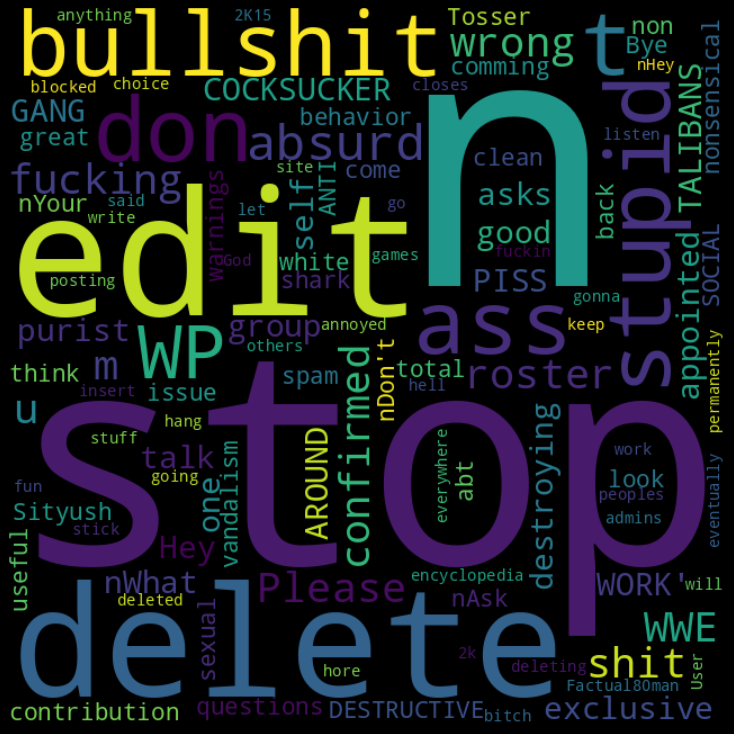

In [5]:
comments = train_df['comment_text'].loc[train_df['toxic']==1].values
wordcloud = WordCloud(
    width = 640,
    height = 640,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(comments))


fig = plt.figure(
    figsize = (15, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show() 

In [6]:
y = train_df['toxic'].values
print(y)

[0 0 0 ... 0 0 0]


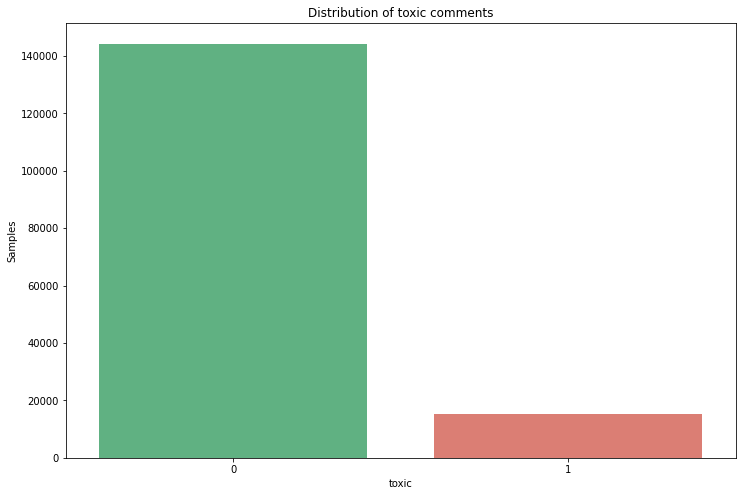

In [7]:
green = '#52BE80'
red = '#EC7063'

plt.figure(figsize=(12,8))
ax = sns.countplot(train_df['toxic'], palette=[green, red]) 
ax.set_title('Distribution of toxic comments')
ax.set_ylabel('Samples');

In [8]:
train_df['toxic'].value_counts()

0    144277
1     15294
Name: toxic, dtype: int64

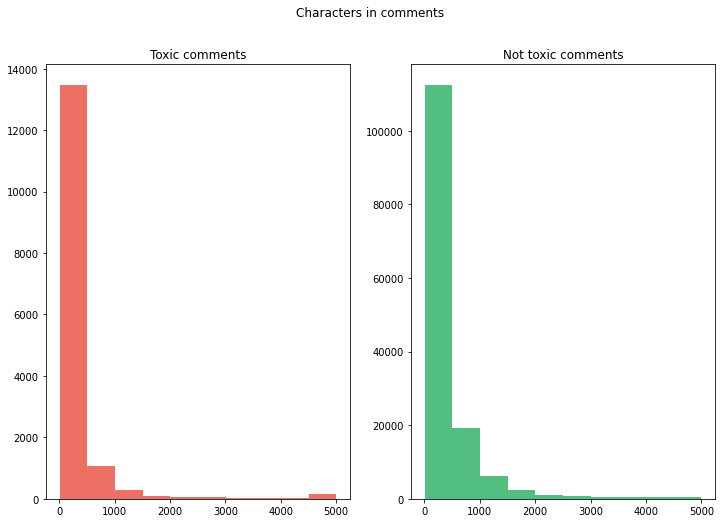

In [9]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
comment_len=train_df[train_df['toxic']==1]['comment_text'].str.len()
ax1.hist(comment_len,color=red)
ax1.set_title('Toxic comments')

comment_len=train_df[train_df['toxic']==0]['comment_text'].str.len()
ax2.hist(comment_len,color=green)
ax2.set_title('Not toxic comments')
fig.suptitle('Characters in comments')
plt.show()

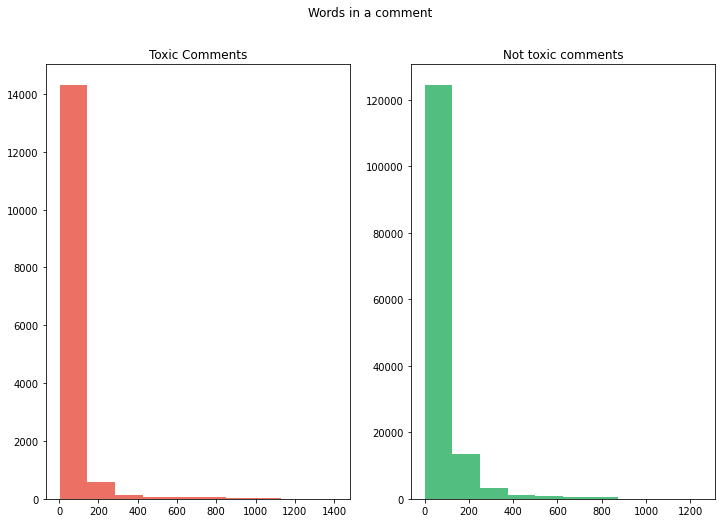

In [10]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize = (12,8))
comment_len=train_df[train_df['toxic']==1]['comment_text'].str.split().map(lambda x: len(x))
ax1.hist(comment_len,color = red)
ax1.set_title('Toxic Comments')

comment_len=train_df[train_df['toxic']==0]['comment_text'].str.split().map(lambda x: len(x))
ax2.hist(comment_len,color = green)
ax2.set_title('Not toxic comments')
fig.suptitle('Words in a comment')
plt.show()

In [11]:
max_features = 20000 
max_text_length = 100

x_tokenizer = text.Tokenizer(max_features)
x_tokenizer.fit_on_texts(list(x))
x_tokenized = x_tokenizer.texts_to_sequences(x)
x_train_val = sequence.pad_sequences(x_tokenized, maxlen = max_text_length)

In [12]:
embedding_dim = 100
embeddings_index = dict()

f = open('glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [13]:
embedding_matrix = np.zeros((max_features, embedding_dim))
for word, index in x_tokenizer.word_index.items():
    if index > max_features -1:
        break
    else:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector

In [14]:
embeddings_index.get('stop')

array([ 0.2425   , -0.47787  , -0.13228  , -0.067827 ,  0.18656  ,
        0.50566  , -0.6272   ,  0.62262  ,  0.46563  , -0.2013   ,
        0.10606  , -0.0074248,  0.018328 ,  0.071007 , -0.10155  ,
        0.047794 , -0.23775  , -0.031302 , -0.49632  ,  0.15608  ,
        0.66928  ,  0.25275  , -0.13324  , -0.38499  ,  0.066809 ,
        0.77926  , -0.60947  , -0.2793   ,  0.89159  , -0.014682 ,
       -0.47358  ,  0.46668  ,  0.27529  ,  0.22201  , -0.28549  ,
       -0.32237  , -0.016588 , -0.75657  ,  0.57294  ,  0.019744 ,
       -0.70022  ,  0.21178  , -0.051869 , -0.38181  , -0.059082 ,
        0.31623  ,  0.11617  , -0.50781  , -0.23866  , -0.83731  ,
        0.4407   ,  0.3665   , -0.29323  ,  1.1963   , -0.10997  ,
       -2.1168   , -0.20417  ,  0.094542 ,  1.9624   , -0.057167 ,
       -0.3005   , -0.17937  ,  0.24791  ,  0.0021858,  0.68972  ,
        0.59606  ,  0.46632  ,  0.35762  , -0.42129  , -0.32616  ,
       -0.50294  , -1.0584   , -0.40357  , -0.71748  ,  0.0178

In [15]:
model = Sequential()
model.add(Embedding(max_features, embedding_dim,
                    embeddings_initializer=tf.keras.initializers.Constant(
                    embedding_matrix), trainable=False))
model.add(Dropout(0.2))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [16]:
filters = 150
kernel_size = 3
hidden_dims = 150

In [17]:
model.add(Conv1D(filters, kernel_size, activation = 'relu'))
model.add(MaxPooling1D())
model.add(Conv1D(filters, kernel_size, activation = 'relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_dims, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         2000000   
_________________________________________________________________
dropout (Dropout)            (None, None, 100)         0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 150)         45150     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 150)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 150)         67650     
_________________________________________________________________
global_max_pooling1d (Global (None, 150)               0         
_________________________________________________________________
dense (Dense)                (None, 150)               2

In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [19]:
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y, test_size = 0.30, random_state = 1235)

In [20]:
%time
batch_size = 64
epochs = 10

model.fit(x_train, y_train, batch_size = batch_size,
          epochs = epochs, validation_data=(x_val, y_val))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs
Train on 111699 samples, validate on 47872 samples
Epoch 1/10
111699/111699 [==============================] - 84s 750us/sample - loss: 0.1560 - acc: 0.9441 - val_loss: 0.1285 - val_acc: 0.9519
Epoch 2/10
111699/111699 [==============================] - 84s 751us/sample - loss: 0.1248 - acc: 0.9539 - val_loss: 0.1160 - val_acc: 0.9580
Epoch 3/10
111699/111699 [==============================] - 88s 787us/sample - loss: 0.1150 - acc: 0.9575 - val_loss: 0.1152 - val_acc: 0.9572
Epoch 4/10
111699/111699 [==============================] - 82s 737us/sample - loss: 0.1083 - acc: 0.9601 - val_loss: 0.1133 - val_acc: 0.9585
Epoch 5/10
111699/111699 [==============================] - 81s 728us/sample - loss: 0.1019 - acc: 0.9617 - val_loss: 0.1129 - val_acc: 0.9594
Epoch 6/10
111699/111699 [==============================] - 83s 742us/sample - loss: 0.0976 - acc: 0.9637 - val_loss: 0.1146 - val_acc: 0.9575
Epoch 7/10
111699/111699 [==

In [21]:
test_df = pd.read_csv('test.csv.zip')

x_test = test_df['comment_text'].values
print(x_test)

["Yo bitch Ja Rule is more succesful then you'll ever be whats up with you and hating you sad mofuckas...i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me. Ja rule is about pride in da music man. dont diss that shit on him. and nothin is wrong bein like tupac he was a brother too...fuckin white boys get things right next time.,"
 '== From RfC == \n\n The title is fine as it is, IMO.'
 '" \n\n == Sources == \n\n * Zawe Ashton on Lapland —  /  "' ...
 '" \n\n == Okinotorishima categories == \n\n I see your changes and agree this is ""more correct.""  I had gotten confused, but then found this: \n :... while acknowledging Japan\'s territorial rights to Okinotorishima itself ... \n However, is there a category for  \n :... did not acknowledge Japan\'s claim to an exclusive economic zone (EEZ) stemming from Okinotorishima. \n That is, is there a category for ""disputed EEZ""s?   "'
 '" \n\n == ""One of the founding nations of the EU - Germany - has a 

In [22]:
x_test_tokenized = x_tokenizer.texts_to_sequences(x_test)
x_testing = sequence.pad_sequences(x_test_tokenized, maxlen=max_text_length)

y_testing = model.predict(x_testing, verbose=1, batch_size=64)

153164/153164 [==============================] - 30s 197us/sample


In [23]:
y_testing.shape

(153164, 1)

In [24]:
test_df['Toxic'] = ['not toxic' if x < .5 else 'toxic' for x in y_testing]
test_df[['comment_text', 'Toxic']].head(10) 

,comment_text,Toxic
0,Yo bitch Ja Rule is more succesful then you'll...,toxic
1,== From RfC == \n\n The title is fine as it is...,not toxic
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",not toxic
3,":If you have a look back at the source, the in...",not toxic
4,I don't anonymously edit articles at all.,not toxic
5,Thank you for understanding. I think very high...,not toxic
6,Please do not add nonsense to Wikipedia. Such ...,not toxic
7,:Dear god this site is horrible.,toxic
8,""" \n Only a fool can believe in such numbers. ...",not toxic
9,== Double Redirects == \n\n When fixing double...,not toxic
